In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [17]:
df["Customer Name"].value_counts()

Seth                2
Walter              2
Caryn Hendrix       1
Len Phillips        1
Ferdinand Weber     1
                   ..
Kitra Kerr          1
Yen Santana         1
Emerald Hamilton    1
Reese Vance         1
Brian Mathews       1
Name: Customer Name, Length: 498, dtype: int64

In [19]:
#There are too many entries in the name column to convert them into dummy data so we will drop it same with the customer email
df = df.drop(["Customer Name" , "Customer e-mail"] , axis = 1)

In [20]:
df.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [23]:
df["Country"].value_counts()

USA    500
Name: Country, dtype: int64

In [24]:
#since we have all the houses in usa, it doesn't have a lot of effect on out purchase amount. So we'll drop it

df = df.drop("Country" , axis = 1)

In [25]:
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [30]:
#seeing what column has the most correlation with our target column

df.corrwith(df["Car Purchase Amount"]).sort_values(ascending=False)[1:]

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
dtype: float64

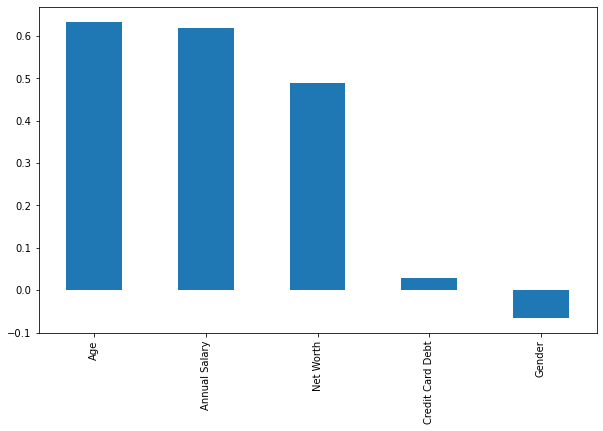

In [32]:
#age is the most related with the target column
plt.figure(figsize=(10,6))
df.corrwith(df["Car Purchase Amount"]).sort_values(ascending=False)[1:].plot(kind = "bar")

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('Car Purchase Amount' , axis = 1).values

In [36]:
y = df["Car Purchase Amount"].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Annual Salary        500 non-null    float64
 3   Credit Card Debt     500 non-null    float64
 4   Net Worth            500 non-null    float64
 5   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [49]:
df.shape

(500, 6)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [55]:
model = Sequential()


model.add(Dense(15 , activation = "relu"))
model.add(Dense(15 , activation = "relu"))
model.add(Dense(15 , activation = "relu"))
model.add(Dense(15 , activation = "relu"))

model.add(Dense(1))

In [56]:
model.compile(optimizer="adam" , loss="mse")

In [57]:
model.fit(x = X_train , y=y_train , validation_data=(X_test,y_test) , batch_size=100,epochs =400)

Epoch 1/400
4/4 [==============================] - 0s 44ms/step - loss: 2041183769.6000 - val_loss: 2032478080.0000
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 2146737075.2000 - val_loss: 2032476288.0000
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 2107185228.8000 - val_loss: 2032475008.0000
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 2090315878.4000 - val_loss: 2032473856.0000
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 2083230284.8000 - val_loss: 2032472832.0000
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 2098981043.2000 - val_loss: 2032471424.0000
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 2100114252.8000 - val_loss: 2032470144.0000
Epoch 8/400
4/4 [==============================] - 0s 14ms/step - loss: 2120472857.6000 - val_loss: 2032468352.0000
Epoch 9/400
4/4 [==============================] - 0s 15ms/step - loss: 

4/4 [==============================] - 0s 12ms/step - loss: 2043284633.6000 - val_loss: 2004844544.0000
Epoch 72/400
4/4 [==============================] - 0s 12ms/step - loss: 2031832550.4000 - val_loss: 2002549248.0000
Epoch 73/400
4/4 [==============================] - 0s 14ms/step - loss: 2079968409.6000 - val_loss: 2000089088.0000
Epoch 74/400
4/4 [==============================] - 0s 13ms/step - loss: 2039013452.8000 - val_loss: 1997476608.0000
Epoch 75/400
4/4 [==============================] - 0s 12ms/step - loss: 2041900083.2000 - val_loss: 1994692352.0000
Epoch 76/400
4/4 [==============================] - 0s 13ms/step - loss: 2065377177.6000 - val_loss: 1991741696.0000
Epoch 77/400
4/4 [==============================] - 0s 14ms/step - loss: 2055273779.2000 - val_loss: 1988601472.0000
Epoch 78/400
4/4 [==============================] - 0s 13ms/step - loss: 2073861068.8000 - val_loss: 1985269760.0000
Epoch 79/400
4/4 [==============================] - 0s 15ms/step - loss: 2045

Epoch 141/400
4/4 [==============================] - 0s 12ms/step - loss: 1132962227.2000 - val_loss: 1048314048.0000
Epoch 142/400
4/4 [==============================] - 0s 12ms/step - loss: 1095228544.0000 - val_loss: 1020722304.0000
Epoch 143/400
4/4 [==============================] - 0s 12ms/step - loss: 1116514534.4000 - val_loss: 992869440.0000
Epoch 144/400
4/4 [==============================] - 0s 12ms/step - loss: 1052450099.2000 - val_loss: 965133376.0000
Epoch 145/400
4/4 [==============================] - 0s 13ms/step - loss: 1032120793.6000 - val_loss: 937169600.0000
Epoch 146/400
4/4 [==============================] - 0s 13ms/step - loss: 991189350.4000 - val_loss: 909192512.0000
Epoch 147/400
4/4 [==============================] - 0s 13ms/step - loss: 940202585.6000 - val_loss: 881222848.0000
Epoch 148/400
4/4 [==============================] - 0s 13ms/step - loss: 884234496.0000 - val_loss: 853134336.0000
Epoch 149/400
4/4 [==============================] - 0s 18ms/step

Epoch 212/400
4/4 [==============================] - 0s 18ms/step - loss: 99530004.8000 - val_loss: 70804232.0000
Epoch 213/400
4/4 [==============================] - 0s 15ms/step - loss: 105797444.8000 - val_loss: 70451064.0000
Epoch 214/400
4/4 [==============================] - 0s 15ms/step - loss: 97686800.0000 - val_loss: 70119544.0000
Epoch 215/400
4/4 [==============================] - 0s 14ms/step - loss: 97733865.6000 - val_loss: 69809552.0000
Epoch 216/400
4/4 [==============================] - 0s 15ms/step - loss: 102729587.2000 - val_loss: 69519432.0000
Epoch 217/400
4/4 [==============================] - 0s 15ms/step - loss: 96831808.0000 - val_loss: 69252304.0000
Epoch 218/400
4/4 [==============================] - 0s 17ms/step - loss: 98763086.4000 - val_loss: 68990256.0000
Epoch 219/400
4/4 [==============================] - 0s 16ms/step - loss: 95730656.0000 - val_loss: 68745992.0000
Epoch 220/400
4/4 [==============================] - 0s 16ms/step - loss: 98518324.800

Epoch 284/400
4/4 [==============================] - 0s 15ms/step - loss: 79527040.0000 - val_loss: 56594884.0000
Epoch 285/400
4/4 [==============================] - 0s 15ms/step - loss: 81713374.4000 - val_loss: 56429248.0000
Epoch 286/400
4/4 [==============================] - 0s 15ms/step - loss: 76721384.0000 - val_loss: 56266904.0000
Epoch 287/400
4/4 [==============================] - 0s 15ms/step - loss: 78016830.4000 - val_loss: 56105412.0000
Epoch 288/400
4/4 [==============================] - 0s 14ms/step - loss: 79509558.4000 - val_loss: 55944868.0000
Epoch 289/400
4/4 [==============================] - 0s 15ms/step - loss: 77903377.6000 - val_loss: 55785904.0000
Epoch 290/400
4/4 [==============================] - 0s 15ms/step - loss: 75343368.8000 - val_loss: 55627440.0000
Epoch 291/400
4/4 [==============================] - 0s 16ms/step - loss: 83432380.8000 - val_loss: 55471192.0000
Epoch 292/400
4/4 [==============================] - 0s 17ms/step - loss: 79053038.4000 

Epoch 356/400
4/4 [==============================] - 0s 16ms/step - loss: 64710528.0000 - val_loss: 46275776.0000
Epoch 357/400
4/4 [==============================] - 0s 14ms/step - loss: 63709764.8000 - val_loss: 46146648.0000
Epoch 358/400
4/4 [==============================] - 0s 12ms/step - loss: 64860691.2000 - val_loss: 46017604.0000
Epoch 359/400
4/4 [==============================] - 0s 13ms/step - loss: 64260085.6000 - val_loss: 45894296.0000
Epoch 360/400
4/4 [==============================] - 0s 15ms/step - loss: 63823056.0000 - val_loss: 45768492.0000
Epoch 361/400
4/4 [==============================] - 0s 14ms/step - loss: 64404772.0000 - val_loss: 45645976.0000
Epoch 362/400
4/4 [==============================] - 0s 18ms/step - loss: 64471103.2000 - val_loss: 45523624.0000
Epoch 363/400
4/4 [==============================] - 0s 18ms/step - loss: 63421522.4000 - val_loss: 45404288.0000
Epoch 364/400
4/4 [==============================] - 0s 18ms/step - loss: 62565219.2000 

In [58]:
losses = pd.DataFrame(model.history.history)

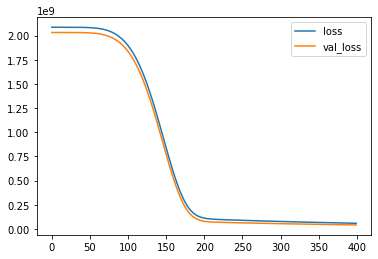

In [59]:
losses.plot()

In [60]:
one_point = df.drop("Car Purchase Amount",axis = 1).iloc[0]

In [63]:
one_point = one_point.values.reshape(-1,5)

In [64]:
model.predict(scaler.transform(one_point))

array([[37843.938]], dtype=float32)

In [65]:
df.iloc[0]

Gender                      0.00000
Age                        42.00000
Annual Salary           62812.09301
Credit Card Debt        11609.38091
Net Worth              238961.25050
Car Purchase Amount     35321.45877
Name: 0, dtype: float64